In [2]:
import sys
sys.path.append('..')
%env WORKDIR ~/Documents/weatherpy-work

env: WORKDIR=~/Documents/weatherpy-work


In [3]:
import pandas as pd
from shapely.geometry import Polygon

def load_chase_alley():
    bdys_df = pd.read_csv('chasealley.csv')
    # depending on the version of shapely, we might have to manually close the polygon
    bdys_df = bdys_df.append(bdys_df.loc[0])
    latlon_mat = bdys_df[['lat', 'lon']].as_matrix()
    return bdys_df, Polygon(latlon_mat)

In [4]:
from wxdata import stormevents

df = stormevents.tornadoes('1996-01-01 00:00', '2017-12-31 23:59', tz='CST',
                          hours=range(12, 24), 
                          months=['April', 'May', 'June'])

/Users/jitang/anaconda/envs/gpdenv/lib/python3.6/multiprocessing/pool.py:44: DtypeWarning: Columns (26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  return list(map(*args))
/Users/jitang/anaconda/envs/gpdenv/lib/python3.6/multiprocessing/pool.py:44: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  return list(map(*args))
/Users/jitang/anaconda/envs/gpdenv/lib/python3.6/multiprocessing/pool.py:44: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  return list(map(*args))
/Users/jitang/anaconda/envs/gpdenv/lib/python3.6/multiprocessing/pool.py:44: DtypeWarning: Columns (29,34,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  return list(map(*args))


In [5]:
df.columns

Index(['begin_yearmonth', 'begin_day', 'begin_time', 'end_yearmonth',
       'end_day', 'end_time', 'episode_id', 'event_id', 'state', 'state_fips',
       'year', 'month_name', 'event_type', 'cz_type', 'cz_fips', 'cz_name',
       'wfo', 'begin_date_time', 'cz_timezone', 'end_date_time',
       'injuries_direct', 'injuries_indirect', 'deaths_direct',
       'deaths_indirect', 'damage_property', 'damage_crops', 'source',
       'magnitude', 'magnitude_type', 'flood_cause', 'category', 'tor_f_scale',
       'tor_length', 'tor_width', 'tor_other_wfo', 'tor_other_cz_state',
       'tor_other_cz_fips', 'tor_other_cz_name', 'begin_range',
       'begin_azimuth', 'begin_location', 'end_range', 'end_azimuth',
       'end_location', 'begin_lat', 'begin_lon', 'end_lat', 'end_lon',
       'episode_narrative', 'event_narrative', 'data_source'],
      dtype='object')

In [6]:
bdys_df, chase_alley = load_chase_alley()
chaseable_tors = stormevents.filter_region(df, chase_alley)

In [7]:
chaseable_tors.head()

,begin_yearmonth,begin_day,begin_time,end_yearmonth,end_day,end_time,episode_id,event_id,state,state_fips,...,end_range,end_azimuth,end_location,begin_lat,begin_lon,end_lat,end_lon,episode_narrative,event_narrative,data_source
1,199605,22,1915,199605,22,1920,2033924,5556025,COLORADO,8.0,...,19.0,N,LAIRD,40.37,-102.10,40.37,-102.10,TORNADO TOOK DOWN SEVERAL POWER POLES AND DAMA...,NaN,PDC
3,199605,31,2013,199605,31,2014,2053076,5579344,TEXAS,48.0,...,6.0,E,CLARENDON,34.93,-100.82,34.93,-100.80,ARES Storm Spotters reported a brief tornado t...,NaN,PDC
4,199605,22,1930,199605,22,1930,2035430,5554505,NEBRASKA,31.0,...,2.0,NE,MILFORD,40.78,-97.02,40.78,-97.02,A shed was destroyed 11/4 miles east of Superi...,NaN,PDC
5,199605,31,1817,199605,31,1818,2053066,5579333,TEXAS,48.0,...,5.0,E,CLAUDE,35.12,-101.30,35.12,-101.28,ARES Storm Spotters reported a brief tornado t...,NaN,PDC
6,199606,23,1430,199606,23,1430,2039266,5562050,NEBRASKA,31.0,...,10.0,S,LOUISVILLE,40.85,-96.15,40.85,-96.15,A tornado briefly touched down on Hwy 50 in Ca...,NaN,PDC


In [8]:
len(chaseable_tors)

7227

In [9]:
from wxdata.stormevents import tors
tors_fixed = tors.correct_tornado_times(chaseable_tors)

In [63]:
def plot_clusters2(cluster_groups, basemap, cluster_colors, noise_color='gray',
                  legend=None):
    from wxdata.plotting import plot_points
    assert len(cluster_groups) == len(cluster_colors)
#     shadow = path_effects.withSimplePatchShadow(offset=(1, -1), alpha=0.6)

    for clust in cluster_groups.clusters:
        color = cluster_colors[clust.index]
        plot_points(clust.pts, basemap, color, markersize=1.5)

In [10]:
pilger = stormevents.filter_on_date(tors_fixed, '2014-06-16')
ddc = stormevents.filter_on_date(tors_fixed, '2016-05-24')
moore = stormevents.filter_on_date(tors_fixed, '2013-05-20')
elreno = stormevents.filter_on_date(tors_fixed, '2013-05-31')
shawnee = stormevents.filter_on_date(tors_fixed, '2013-05-19')
bowdle = stormevents.filter_on_date(tors_fixed, '2010-05-22')
wray = stormevents.filter_on_date(tors_fixed, '2016-05-07')
dimmitt = stormevents.filter_on_date(tors_fixed, '2017-04-14')
dallas = stormevents.filter_on_date(tors_fixed, '2012-04-03')
rozel = stormevents.filter_on_date(tors_fixed, '2013-05-18')
anadarko = stormevents.filter_on_date(tors_fixed, '1999-05-03')
wynnewood = stormevents.filter_on_date(tors_fixed, '2016-05-09')
marquette = stormevents.filter_on_date(tors_fixed, '2012-04-14')
attica = stormevents.filter_on_date(tors_fixed, '2004-05-29')
manchester = stormevents.filter_on_date(tors_fixed, '2003-06-24')
coleridge = stormevents.filter_on_date(tors_fixed, '2014-06-17')

campo = stormevents.filter_on_date(tors_fixed, '2010-05-31')
bradshaw = stormevents.filter_on_date(tors_fixed, '2011-06-20')
cantonlake = stormevents.filter_on_date(tors_fixed, '2011-05-24')
goshenwy = stormevents.filter_on_date(tors_fixed, '2009-06-05')
simla = stormevents.filter_on_date(tors_fixed, '2015-06-04')
hillcity = stormevents.filter_on_date(tors_fixed, '2007-05-22')
spencer = stormevents.filter_on_date(tors_fixed, '1998-05-30')

all_events = [pilger, ddc, moore, elreno, shawnee, bowdle, wray, dimmitt, dallas,
             rozel, anadarko, wynnewood, attica, manchester, coleridge,
             campo, bradshaw, cantonlake, goshenwy, simla, hillcity, spencer]

In [140]:
quinter2 = stormevents.filter_on_date(tors_fixed, '2008-05-23')

In [151]:
dupree = stormevents.filter_on_date(tors_fixed, '2010-06-16')

In [152]:
dupree_group = st_clusters(dupree, eps_km=80, eps_min=60, min_samples=15)

In [153]:
len(dupree_group.biggest_cluster())

51

In [149]:
from wxdata.extras import st_clusters

clust_group = st_clusters(rozel, eps_km=80, eps_min=60, min_samples=15)
len(clust_group.biggest_cluster())

60

In [148]:
clust_group.biggest_cluster().centroid

(35.09180175438597, -97.64991929824559)

#### Involved cluster indices: index | is_biggest | len
* Pilger (6/16/14): 0 | True | 132
* DDC (5/24/16): 0 | True | 305 (before: 296)
* Moore (5/20/13): 1 | True | 57 (before: 39)
* El Reno (5/31/13): 1 | True | 84
* Shawnee (5/19/13): 0 | True | 122
* Bowdle (5/22/10): 1 | True | 76 (before: 73)
* Wray (5/7/16): 0 | True | 40
* Dimmitt (4/14/17): 0 | True | 49
* Dallas (4/3/12): 0 | True | 89
* Rozel (5/18/13): 1 | True | 60 (before: 44)
* Anadarko (5/3/99): 3 | True | 629
* Wynnewood (5/9/16): 0 | True | 88 (before: 87)
* Marquette (4/14/12): 0 | True | 260 (before: 258)
* Attica (5/29/04): 2 | False | 98 [max: 135]
* Manchester (6/24/03): 1 | True | 219 (before: False | 102)
* Coleridge (6/17/14): 1 | True | 131
* Campo (5/31/10): 0 | False | 20

#### Additional:
* Bradshaw NE (6/20/11): 3 | True | 258 (before: False | 58)
* Canton Lake OK (5/24/11): 4 | True | 293 (before: False | 28)
* Goshen Co WY (6/5/09): 0 | True | 24
----------
Ignore
* Simla CO (6/4/15): 0 | True | 88
* Hill City (5/22/07): 0 | True | 12
* Spencer (5/30/98): 0 | True | 63

15-30 min: Campo, Goshen WY

30-60 min: Moore, Wray, Dimmitt

60-120 min: El Reno, Bowdle, Dallas, Rozel, Wynnewood, Attica, (Simla, Spencer)

120+ min: Pilger, DDC, Shawnee, Anadarko, Marquette, Manchester, Coleridge, Bradshaw, Canton Lake

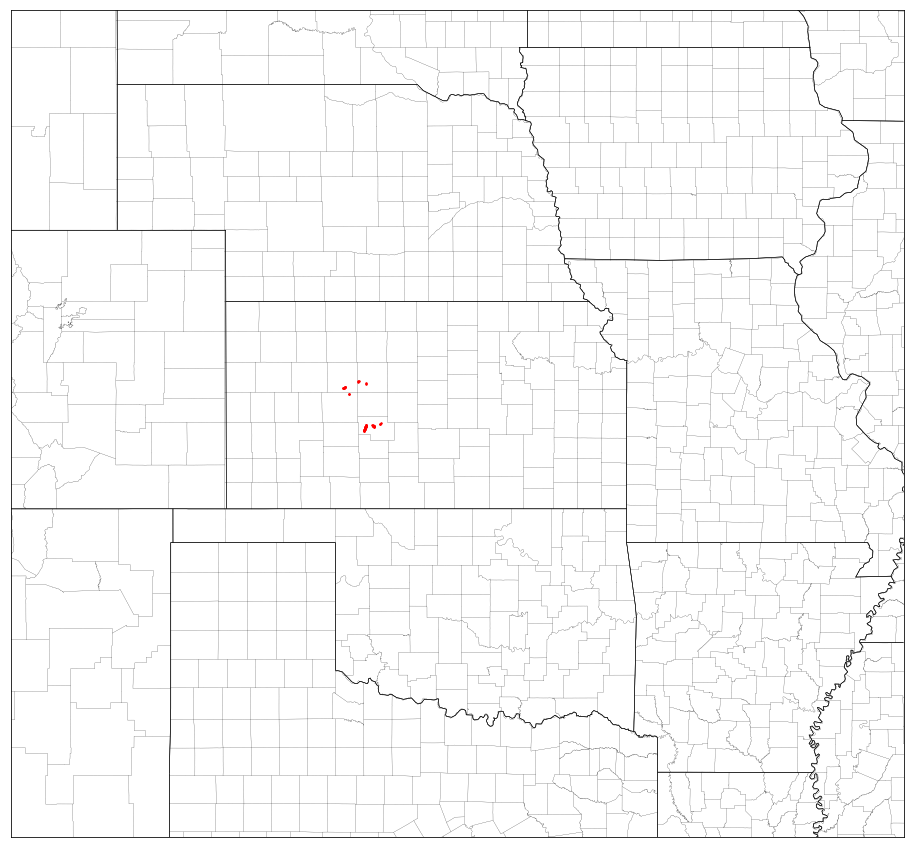

In [150]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(16, 18))
# 32, 44 for southern plains
srnplains = (-106, -89.5, 32, 44)
nrnplains = (-106, -89.5, 40, 52)
# 40, 52 for northern palsin
basemap = simple_basemap(bbox=srnplains, proj='merc', 
                   draw=('coastlines', 'countries', 'states', 'counties'))
plot_clusters2(clust_group, basemap, sample_colors(len(clust_group), 'rainbow_r'))

(array([0., 0., 1., 0., 2., 1., 0., 1., 2., 1., 0., 1., 1., 0., 1., 0., 1.,
        3., 0., 1., 1., 0., 0., 0., 1., 0., 2., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295]),
 <a list of 59 Patch objects>)

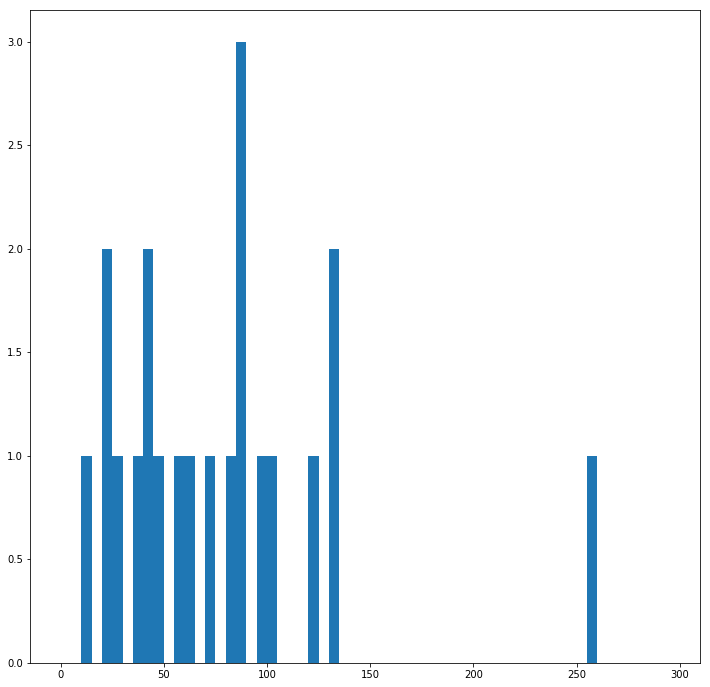

In [159]:
cluster_mins = [132, 296, 39, 84, 122, 73, 40, 49, 89, 44, 629, 87, 258, 98, 102, 131, 20, 
                58, 28, 24, 88, 12, 63]

fig, ax = plt.subplots(figsize=(12, 12))
ax.hist(cluster_mins, bins=range(0, 300, 5))

In [166]:
from wxdata.stormevents import time_partition
from wxdata.utils import datetime_buckets

def buckets_for_year(year):
    t1 = pd.Timestamp(year=year, month=4, day=1, hour=0, minute=0)
    t2 = pd.Timestamp(year=year, month=7, day=1, hour=0, minute=0)
    return datetime_buckets(t1, t2, '1 day', tz='CST')

def clusters_for_year(df, year, min_samples=15):
    ret = {}
    for (start, _), datetors in time_partition(df, buckets_for_year(year)):
        dateclusts = st_clusters(datetors, eps_km=60, eps_min=60, min_samples=min_samples)
        if dateclusts:
            ret[start] = dateclusts
    return ret

In [211]:
sizes = []
for year in range(1996, 2018):
    threshold = 10
    clusts = clusters_for_year(tors_fixed, year, min_samples=threshold)
    for date_, dateclustgroup in clusts.items():
        for clust in dateclustgroup.clusters:
            if len(clust) < threshold:
                print(date_)

            sizes.append(len(clust))

2008-05-25 00:00:00-06:00


In [197]:
from wxdata.stormevents import filter_on_date
clusts = st_clusters(filter_on_date(tors_fixed, '1997-05-25'), eps_km=60, eps_min=60, min_samples=5)

In [201]:
for clust in clusts.clusters:
    if len(clust) < 5:
        print(clust.describe_tors(show_index=True))
#     print(len(clust))

(5) 1997-05-25 18:58 to 1997-05-25 19:44
3 segments (EF0: 3, EF1: 0, EF2: 0, EF3: 0, EF4: 0, EF5: 0)
0 fatalities | 0 injuries


In [204]:
clusts[5].events

,begin_yearmonth,begin_day,begin_time,end_yearmonth,end_day,end_time,episode_id,event_id,state,state_fips,...,end_range,end_azimuth,end_location,begin_lat,begin_lon,end_lat,end_lon,episode_narrative,event_narrative,data_source
631,199705,25,1943,199705,25,1943,1047632,5613822,OKLAHOMA,40.0,...,8.0,WNW,MADILL,34.13,-96.90,34.13,-96.90,Summary of events of the afternoon and evening...,Reported by spotter. No reported damage.,PDC
761,199705,25,1920,199705,25,1920,1047632,5614012,OKLAHOMA,40.0,...,3.0,NE,MILL CREEK,34.43,-96.78,34.43,-96.78,Summary of events of the afternoon and evening...,Reported by spotter. No reported damage.,PDC
766,199705,25,1858,199705,25,1858,1047632,5613810,OKLAHOMA,40.0,...,8.0,E,ROFF,34.63,-96.70,34.63,-96.70,Summary of events of the afternoon and evening...,A tornado unroofed a barn and downed a swath o...,PDC


In [191]:
sizes2 = [size for size in sizes if size >= 10]

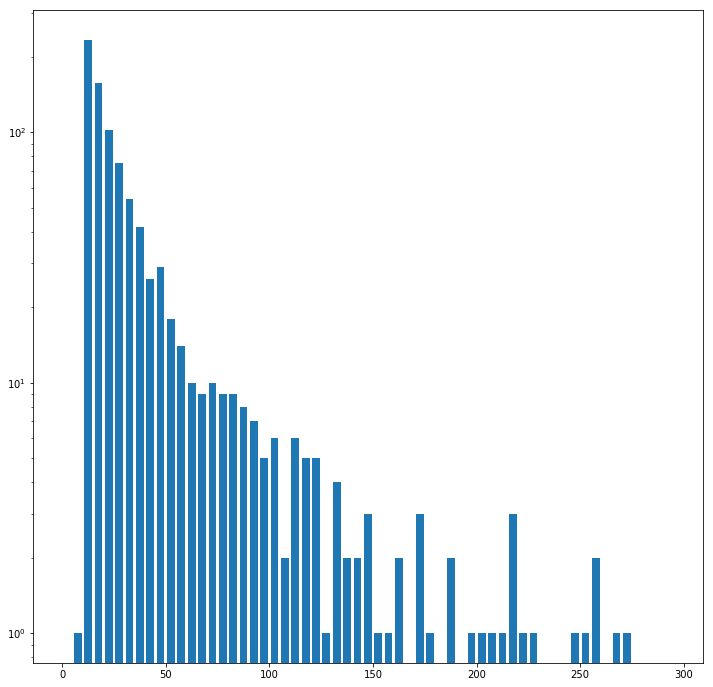

In [214]:
fig, ax = plt.subplots(figsize=(12, 12))
arr = ax.hist(sizes, bins=range(0, 300, 5), log=True, rwidth=0.75)

In [153]:
help(ax.hist)

Help on method hist in module matplotlib.axes._axes:

hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values,

In [141]:
from wxdata.extras import st_clusters
groups = st_clusters(simla, eps_km=60, eps_min=60, min_samples=5)

In [143]:
biggest = groups.biggest_cluster()
# biggest = groups[4]
biggest.describe_tors(), biggest.index, len(biggest)

('2015-06-04 16:38 to 2015-06-04 19:14\n19 segments (EF0: 16, EF1: 3, EF2: 0, EF3: 0, EF4: 0, EF5: 0)\n0 fatalities | 0 injuries',
 0,
 88)

In [142]:
for clust in groups.clusters:
    print(clust.describe_tors(show_index=True))

(0) 2015-06-04 16:38 to 2015-06-04 19:14
19 segments (EF0: 16, EF1: 3, EF2: 0, EF3: 0, EF4: 0, EF5: 0)
0 fatalities | 0 injuries


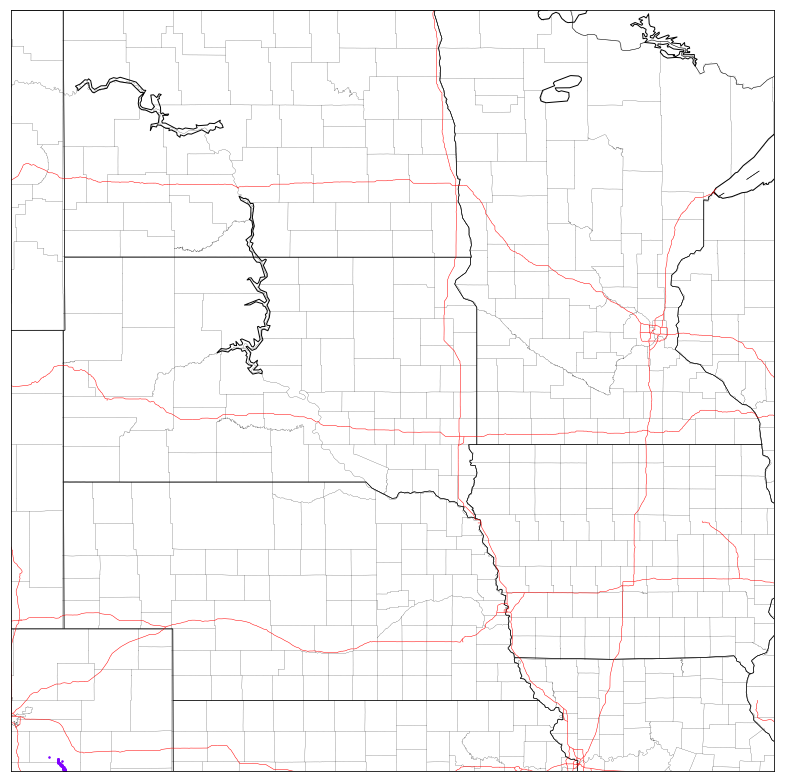

In [134]:
# from wxdata.extras import plot_clusters
fig = plt.figure(figsize=(14, 14))
# pilger_map = simple_basemap(proj='merc', bbox=(-105, -91, 33, 43))
pilger_map = simple_basemap(proj='merc', bbox=(-105, -91, 39, 49))
colors = sample_colors(len(groups), 'rainbow')
plot_clusters2(groups, pilger_map, colors)
# stormevents.tors.plot_tornadoes(groups[3].events, pilger_map, color='red')

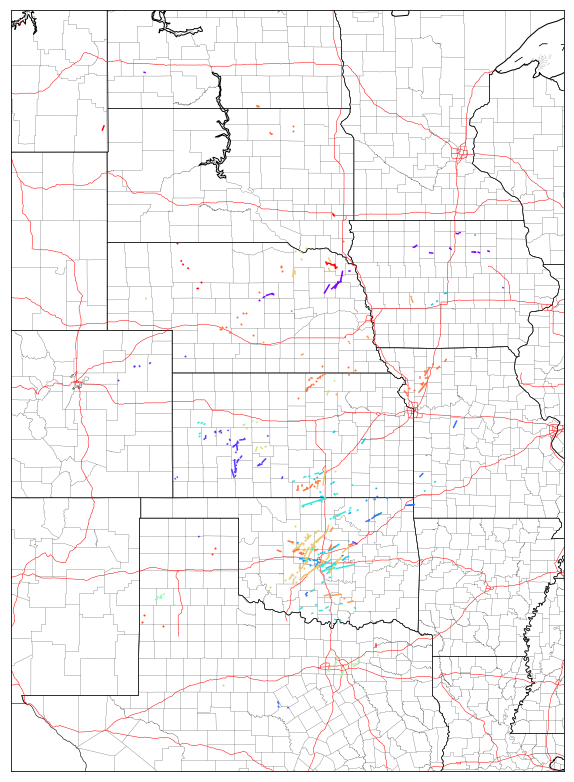

In [13]:
from wxdata.plotting import simple_basemap, sample_colors
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(14, 14))
basemap = simple_basemap(proj='merc', bbox=(-107, -90, 30, 48))

for event, color in zip(all_events, sample_colors(len(all_events), 'rainbow')):
    stormevents.tors.plot_tornadoes(event, basemap, color=color)

In [70]:
from wxdata.utils import datetime_buckets
from wxdata.extras import st_clusters
from wxdata.stormevents import time_partition, filter_on_year

def buckets_for_year(year):
    t1 = pd.Timestamp(year=year, month=4, day=1, hour=0, minute=0)
    t2 = pd.Timestamp(year=year, month=7, day=1, hour=0, minute=0)
    return datetime_buckets(t1, t2, '1 day', tz='CST')

def clusters_for_year(df, year, min_samples=15):
    ret = {}
    for (start, _), datetors in time_partition(df, buckets_for_year(year)):
        dateclusts = st_clusters(datetors, eps_km=60, eps_min=60, min_samples=min_samples)
        if dateclusts:
            ret[start] = dateclusts
    return ret

In [71]:
def dates_with_clusters(found_clusts):
    ret = pd.DataFrame()
    ret['clust_dates'] = clusts.keys()
    ret['year'] = ret['clust_dates'].dt.year
    ret['month'] = ret['clust_dates'].dt.month
    ret['day'] = ret['clust_dates'].dt.day
    ret['size'] = ret.apply(lambda r: clusts[r.clust_dates].numpoints(), axis=1)
    ret['biggest'] = ret.apply(lambda r: len(clusts[r.clust_dates].biggest_cluster()), axis=1)
    return ret

In [72]:
aggregated = []
for year in range(1996, 2018):
    clusts = clusters_for_year(tors_fixed, year)
    aggregated.append(dates_with_clusters(clusts))
    
all_clust_dates = pd.concat(aggregated)

In [73]:
all_clust_dates.head()

,clust_dates,year,month,day,size,biggest
0,1996-04-21 00:00:00-06:00,1996,4,21,88,62
1,1996-05-08 00:00:00-06:00,1996,5,8,94,94
2,1996-05-09 00:00:00-06:00,1996,5,9,17,17
3,1996-05-17 00:00:00-06:00,1996,5,17,56,56
4,1996-05-22 00:00:00-06:00,1996,5,22,23,23


In [130]:
clust_distr = all_clust_dates.groupby(['month', 'day']).count().reset_index()[['month', 'day', 'clust_dates']]
clust_distr['date'] = clust_distr.apply(lambda r: pd.Timestamp(year=2017, month=r.month, day=r.day), axis=1)

fills = pd.DataFrame(columns=['month', 'day', 'clust_dates', 'date'])
from datetime import date
for fill_start, fill_end in buckets_for_year(2017):
    to_date = pd.Timestamp(year=fill_start.year, month=fill_start.month, 
                           day=fill_start.day).to_datetime64()
    
    if to_date not in clust_distr.date.values:
        row = {
            'month': fill_start.month,
            'day': fill_start.day,
            'clust_dates': 0,
            'date': to_date
        }
        fills.loc[len(fills)] = row
        
clust_distr = pd.concat([clust_distr, fills])

In [133]:
clust_distr.sort_values('clust_dates', ascending=False).head(10)

,month,day,clust_dates,date
70,6,12,11,2017-06-12
37,5,10,9,2017-05-10
69,6,11,9,2017-06-11
74,6,16,8,2017-06-16
57,5,30,8,2017-05-30
63,6,5,8,2017-06-05
61,6,3,8,2017-06-03
51,5,24,8,2017-05-24
80,6,22,8,2017-06-22
52,5,25,7,2017-05-25


In [76]:
clust_biggest = all_clust_dates.loc[:, ['clust_dates', 'biggest']]

def to_dummy_date(row):
    date_ = row.clust_dates
    return pd.Timestamp(year=2017, month=date_.month, day=date_.day)

clust_biggest['dummy_date'] = clust_biggest.apply(to_dummy_date, axis=1)

In [196]:
clust_biggest.sort_values('biggest', ascending=False).head(20)

,clust_dates,biggest,dummy_date
6,1999-05-03 00:00:00-06:00,629,2017-05-03
9,2008-05-23 00:00:00-06:00,449,2017-05-23
11,2016-05-24 00:00:00-06:00,296,2017-05-24
7,2007-05-04 00:00:00-06:00,270,2017-05-04
6,2011-05-24 00:00:00-06:00,265,2017-05-24
3,2012-04-14 00:00:00-06:00,258,2017-04-14
4,2003-05-04 00:00:00-06:00,256,2017-05-04
2,1999-04-08 00:00:00-06:00,251,2017-04-08
3,2014-05-11 00:00:00-06:00,220,2017-05-11
1,2010-05-10 00:00:00-06:00,219,2017-05-10


In [184]:
def moving_avg(numdays):
    barebones = clust_distr[['date', 'clust_dates']].sort_values('date')
    barebones.set_index('date', inplace=True)
    window = str(numdays) + 'd'
    movingavg = barebones.rolling(window=window, min_periods=numdays).mean()
    return movingavg[~movingavg.clust_dates.isna()]

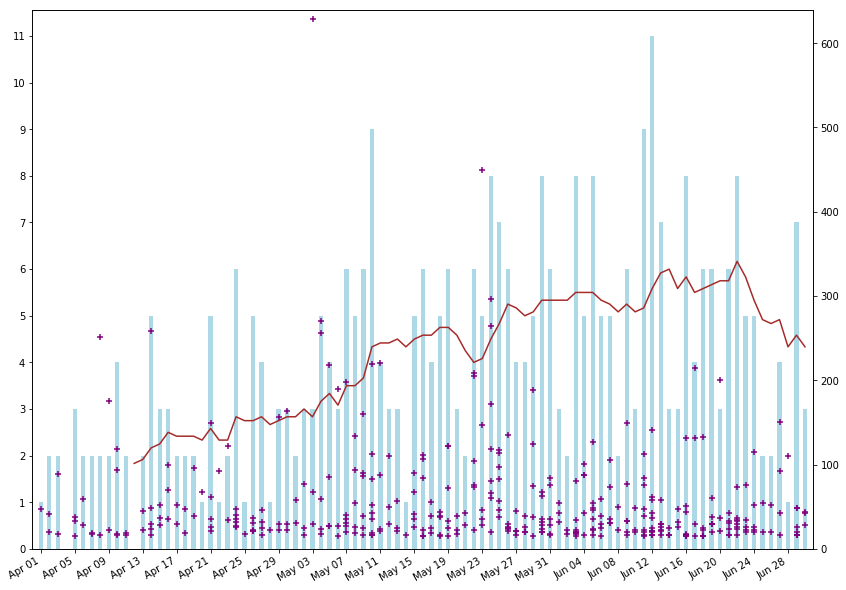

In [193]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date

fig, ax = plt.subplots(figsize=(14, 11))
ax.bar(clust_distr['date'], clust_distr['clust_dates'], color='lightblue', width=0.5)
ax.plot(moving_avg(12), color='brown', linewidth=1.5)

datemin = date(2017, 3, 31)
datemax = date(2017, 7, 1)
ax.set_xlim(datemin, datemax)
ax.set_yticks(range(max(clust_distr.clust_dates) + 1))

ax2 = ax.twinx()
ax2.scatter(clust_biggest['dummy_date'].values, clust_biggest['biggest'].values, 
            color='purple', marker='+', s=45)
ax2.set_ylim(0, clust_biggest['biggest'].max() + 10)

ax2.set_xlim(datemin, datemax)
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=4))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

fig.autofmt_xdate()